In [2]:
#Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
#Read the dataset
dataset = pd.read_excel('Data_Train.xlsx')

In [4]:
#Print the top 5 records
dataset.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
# Print the shape of the dataset
print(dataset.shape)

(6237, 9)


In [6]:
#Check for the null values
dataset.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

There are no null values in the dataset

In [7]:
print(dataset.dtypes)

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object


There is only one numerical value from the raw data. The reviews and ratings columns need to be changed to numerical format.

In [8]:
#Importing Regular Expression
import re

In [9]:
#Define the pattern
pat= r'\d{1,2}\s\w+\s\d{4}'
#Extract Date
dataset['Edition'] = pd.to_datetime(dataset['Edition'].str.extract(f'({pat})')[0])
per=r'\d+'
dataset["Reviews"]=[int(re.findall(per,s)[0]) for s in dataset["Reviews"]]
dataset["Ratings"]=[int(re.findall(per,s)[0]) for s in dataset["Ratings"]]
dataset.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,2016-03-10,4,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,2012-11-07,3,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,1982-02-25,4,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,2017-10-05,4,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,2006-10-10,5,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [11]:
#Checking the distribution of the data.
dataset.describe()

,Reviews,Ratings,Price
count,6237.000000,6237.000000,6237.000000
mean,3.961841,29.828122,560.707516
std,0.757993,84.139256,690.110657
min,1.000000,1.000000,25.000000
25%,4.000000,2.000000,249.180000
50%,4.000000,6.000000,373.000000
75%,4.000000,21.000000,599.000000
max,5.000000,973.000000,14100.000000


There are three numerical values from the data.

<AxesSubplot: xlabel='Reviews', ylabel='Price'>

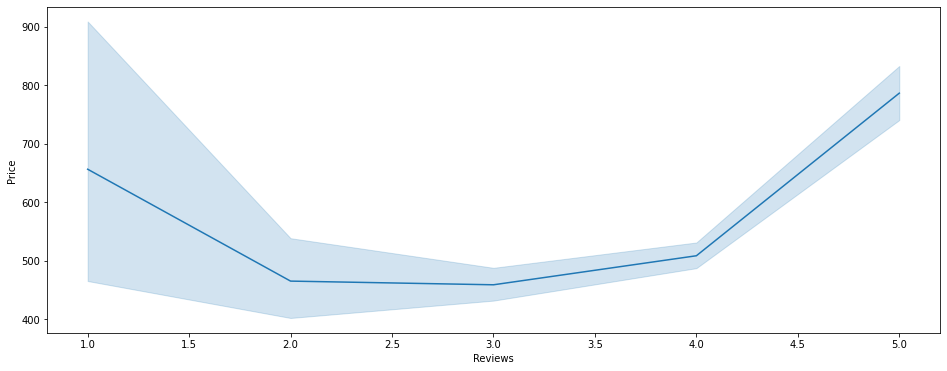

In [67]:
#Plot the for reviews against the price
plt.figure(figsize=(16,6))

sns.lineplot(data='dataset', x=dataset['Reviews'], y=dataset['Price'])

<AxesSubplot: xlabel='Ratings', ylabel='Price'>

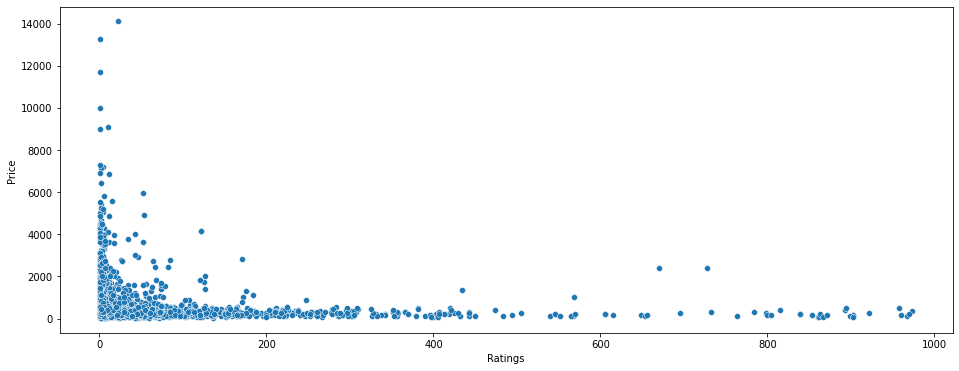

In [13]:
#Plot the for reviews against the price
plt.figure(figsize=(16,6))

sns.scatterplot(data='dataset', x=dataset['Ratings'], y=dataset['Price'])

In [16]:
from sklearn.preprocessing import LabelEncoder
#Create a label encoder object
le = LabelEncoder()

#Transform the categorical values into numerical variables
dataset1 = dataset[dataset.columns[6:8]].apply(le.fit_transform)
dataset1.head()

,Genre,BookCategory
0,1,0
1,74,2
2,193,6
3,92,5
4,253,1


In [18]:
#Create a dataframe with the numerical values
dataset2=dataset[["Reviews","Ratings","Price"]]

#Combine the transformed categorical variables and the numerical variables into a single dataframe
newdataset=pd.concat([dataset1,dataset2],axis=1)

newdataset.head()

,Genre,BookCategory,Reviews,Ratings,Price
0,1,0,4,8,220.00
1,74,2,3,14,202.93
2,193,6,4,6,299.00
3,92,5,4,13,180.00
4,253,1,5,1,965.62


In [20]:
#Load test dataset
testdataset = pd.read_excel('Data_Test.xlsx')

#Define the pattern
pat= r'\d{1,2}\s\w+\s\d{4}'
#Extract Date
testdataset['Edition'] = pd.to_datetime(testdataset['Edition'].str.extract(f'({pat})')[0])
per=r'\d+'
testdataset["Reviews"]=[int(re.findall(per,s)[0]) for s in testdataset["Reviews"]]
testdataset["Ratings"]=[int(re.findall(per,s)[0]) for s in testdataset["Ratings"]]
testdataset.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,1986-10-01,4,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,2018-04-26,5,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,2011-03-17,5,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,NaT,4,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,2011-12-26,4,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [22]:
from sklearn.preprocessing import LabelEncoder
#Create label encoder object
le = LabelEncoder()

#Transorm categorical variables to numerical variables
testdataset1 = testdataset[testdataset.columns[6:8]].apply(le.fit_transform)

#Combine the datasets
testdataset2=testdataset[["Reviews","Ratings"]]
newtestdataset=pd.concat([testdataset1,testdataset2],axis=1)
newtestdataset.head()

,Genre,BookCategory,Reviews,Ratings
0,189,5,4,960
1,163,4,5,1
2,185,9,5,4
3,174,4,4,11
4,143,7,4,9


In [29]:

#Import the necessary package for linear regression 
from sklearn.linear_model import LinearRegression

#split the training dataset into indipendent and dependent variables
X_train = newdataset.iloc[:, :-1].values # features
y_train = newdataset.iloc[:, -1].values # target variable

#Create a linear regression model
regressor = LinearRegression()

#fit the model with training data
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
#Predict dependent variable for test data
y_pred = regressor.predict(newtestdataset)

print("The predicted target variable: ", y_pred)

The predicted target variable:  [-126.15364555  722.29964248  684.80913622 ...  564.90811826  534.77349266
  534.56117544]


c:\Python\Python3.10\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [51]:
#Create a list from the predicted target variable
price_values = y_pred.tolist()


In [52]:
#Export the predicted values to csv
import csv

price_values = y_pred.tolist()

with open('price_values.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows([price_values])
